In [52]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

%matplotlib inline

In [2]:
# train.csv в переменную data_train
# index_col = 0 (PassengerId)
data_train = pd.read_csv('titanic/train.csv', index_col=0)

# Изучение данных

* Survived - 
* Pclass - 
* Name - 
* Sex - 
* Age - 
* SibSp - 
* Parch - 
* Ticket - 
* Fare - 
* Cabin - 
* Embarked -

In [3]:
# посмотрим топ 5
print('Shape -', data_train.shape)
data_train.head()

Shape - (891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Графики

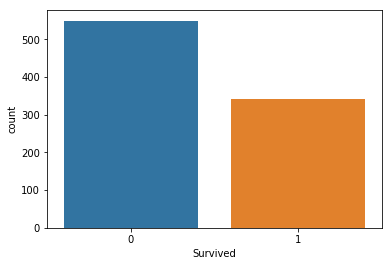

In [5]:
# seaborn .countplot для того чтобы посомотреть долю Выживших
sns.countplot('Survived', data=data_train);

In [6]:
# доля выживших
data_train.Survived.mean()

0.3838383838383838

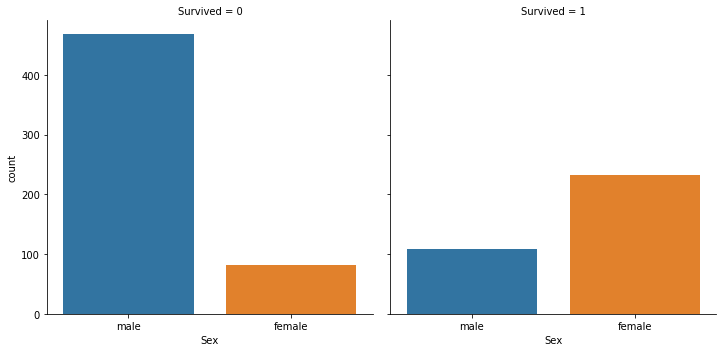

In [7]:
# доля выживших среди женщин и мужчин
sns.catplot(x='Sex', col='Survived', kind='count', data=data_train);

In [8]:
# Точное количество выживших с разделением по полу
pd.crosstab(index=data_train['Sex'],
            columns=[data_train.Survived])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [9]:
# Точное количество выживших с разделением по полу с учётом их класса
pd.crosstab(index=[data_train.Survived, data_train['Sex']],
            columns=[data_train.Pclass],
            margins=True,)

Pclass             1    2    3  All
Survived Sex                       
0        female    3    6   72   81
         male     77   91  300  468
1        female   91   70   72  233
         male     45   17   47  109
All              216  184  491  891

> Среди выживших больше всего женщин, причём первого класса

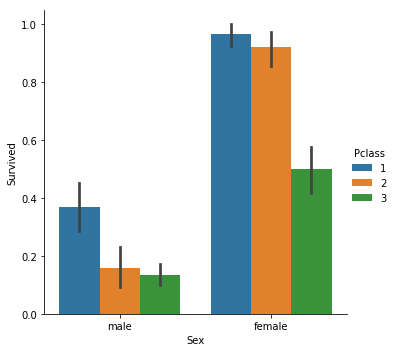

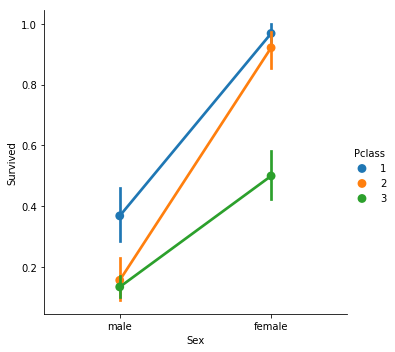

In [10]:
# визуализация (Bar chart и Line chart)
sns.catplot(x="Sex", y="Survived", hue="Pclass",
            kind="bar", data=data_train);
sns.catplot(x="Sex", y="Survived", hue="Pclass",
            kind="point", data=data_train);

> Более всего информативен -> Bar chart

In [11]:
# Данные о среднем возрасте выживших, с разбивкой по выживаемости, полу и классу
pd.crosstab(index=[data_train.Survived, data_train['Sex']],
            columns=[data_train.Pclass],
            values=data_train['Age'],
            aggfunc='mean',
            margins=True)

Pclass                   1          2          3        All
Survived Sex                                               
0        female  25.666667  36.000000  23.818182  25.046875
         male    44.581967  33.369048  27.255814  31.618056
1        female  34.939024  28.080882  19.329787  28.847716
         male    36.248000  16.022000  22.274211  27.276022
All              38.233441  29.877630  25.140620  29.699118

> средний возраст выживших женщин пассажиров 1 класса -> 34.939024

In [12]:
# тоже самое через .pivot_table


# Стоимость проезда среди выживших и погибших

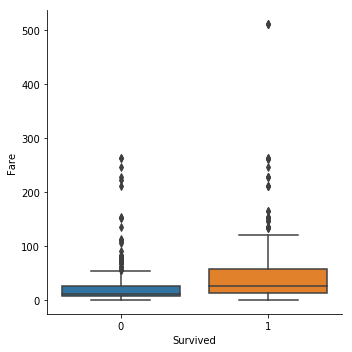

In [13]:
# сравнение стоимости проезда между выжившими и погибшими
sns.catplot(x = 'Survived', y = 'Fare', data=data_train, kind="box");

> недостаточно информативно (количественно)

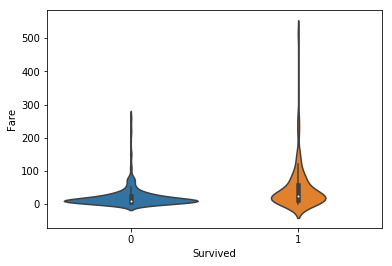

In [14]:
# более информативная версия через .violinplot
sns.violinplot(x = 'Survived', y = 'Fare',
               data=data_train);

> более выражено количество выживших

# График совместного распределения Возраста и Стоимости проезда

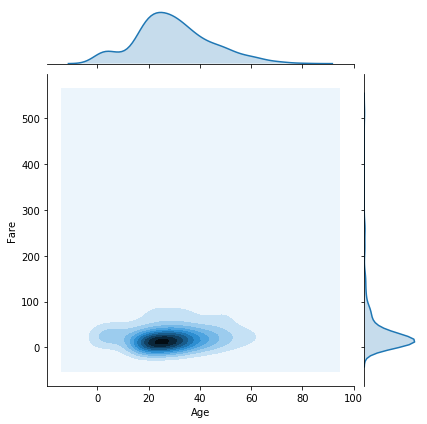

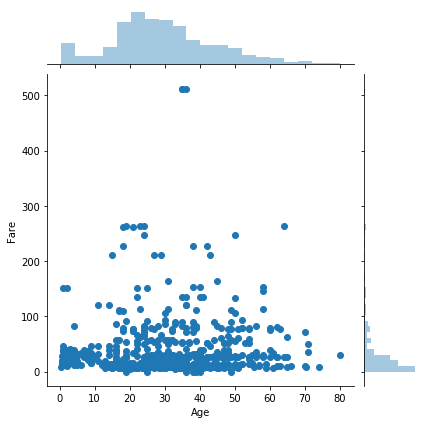

In [15]:
# график совместного распределения Возраста и Стоимости проезда
sns.jointplot(x="Age", y="Fare", data=data_train, kind="kde");
sns.jointplot(x="Age", y="Fare", data=data_train, kind="scatter");

In [16]:
# поиск 95 квантиля
q = data_train["Fare"].quantile(0.95)
print(q)

# Поиск индексов строк в которых значение в столбце Fare больше чем q
ind = np.where(data_train['Fare'] > q)[0]+1

# Выбрасывание из data_train строки с номерами ind и сохранение результата в переменную data_new
data_new = data_train.drop(index=np.where(data_train['Fare'] > q)[0]+1, axis=0)

112.07915


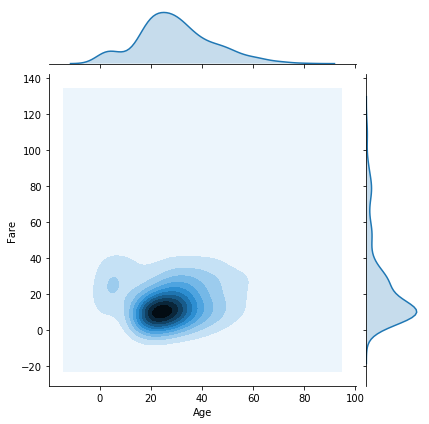

In [17]:
# график совместного распределения Возраста и Стоимости проезда 
sns.jointplot(x="Age", y="Fare", data=data_new, kind="kde");

# Построить еще графиков и посикать еще зависимостей

# Обработка признаков

In [18]:
data_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S


In [19]:
# Категориальные признаки
cat_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']
# Числовые признаки
num_features = ['Age', 'Fare', 'SibSp', 'Parch']

In [20]:
# обработка признаков
# имя -> длина
data_train['Name'].apply(len)[:10]

# кабина
def cabin(val):
    if type(val) is str:
        return 1
    else:
        return 0

data_train.Cabin.apply(cabin)[:10]

# Выбрасывание столбца Ticket из данных
data_train.drop(labels='Ticket', axis=1).head()

# one-hot encoding по Embarked и Pclass (Место посадки и Класс)
pd.get_dummies(data_train, columns = ['Embarked', 'Pclass'])[['Embarked_C', 'Embarked_Q',
                                                              'Embarked_S', 'Pclass_1',
                                                              'Pclass_2', 'Pclass_3', ]][:3]

# Пол
def sex(x):
    if x == 'male':
        return 0
    else:
        return 1

data_train.Sex.apply(sex)[:5]

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Sex, dtype: int64

In [21]:
# Функция кодирования категориальных признаков
def process_cat(df):
    
    def cabin(val):
        if type(val) is str:
            return 1
        else:
            return 0
    
    def sex(x):
        if x == 'male':
            return 0
        else:
            return 1
    
    df['Name_len'] = df['Name'].apply(len)
    df['is_Cabin'] = df['Cabin'].apply(cabin)
    df['Sex'] = df['Sex'].apply(sex)    
    df = pd.get_dummies(df, columns = ['Embarked', 'Pclass'])
    
    df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
    
    return df

df = process_cat(data_train)
data_train.sample(10)
df.sample(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Name_len,is_Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,
738,1,0,35.0,0,0,512.3292,22,1,1,0,0,1,0,0
866,1,1,42.0,0,0,13.0000,24,0,0,0,1,0,1,0
1,0,0,22.0,1,0,7.2500,23,0,0,0,1,0,0,1
433,1,1,42.0,1,0,26.0000,51,0,0,0,1,0,1,0
732,0,0,11.0,0,0,18.7875,24,0,1,0,0,0,0,1
226,0,0,22.0,0,0,9.3500,28,0,0,0,1,0,0,1
830,1,1,62.0,0,0,80.0000,41,1,0,0,0,1,0,0
655,0,1,18.0,0,0,6.7500,28,0,0,1,0,0,0,1
398,0,0,46.0,0,0,26.0000,23,0,0,0,1,0,1,0


# Заполнение пропусков

In [22]:
# изучение .groupby
data_train.groupby(['Sex'])['Age'].mean()
data_train.groupby(['Sex', 'Pclass'])['Age'].median()
data_train.groupby(['Sex', 'Pclass'])['Survived'].mean()
data_train.groupby(['Pclass'])['Fare'].max()
data_train.groupby(['Pclass'])['Fare'].min()
data_train.groupby(['Pclass'])['Fare'].quantile(.03)
data_train.groupby(['Sex', 'Pclass', 'Embarked'])['Age', 'Fare'].mean()

# изучение .transform
def percent(x):
    return str(100* np.round(np.mean(x), 2)) + '%'

data_train.groupby(['Sex', 'Pclass'])['Survived'].apply(percent)

data_train.groupby(['Sex', 'Pclass'])['Survived'].transform(percent)[:5]

data_train.groupby(['Sex', 'Pclass'])['Survived'].count()

# изучение .fillna
data_train['Age'][:10]
data_train['Age'].fillna(0)[:10]
data_train['Age'].fillna(9999)[:10]

PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
6     9999.0
7       54.0
8        2.0
9       27.0
10      14.0
Name: Age, dtype: float64

In [23]:
# заполнения возраста средним в целом
data_train['Age'].fillna(np.mean(data_train['Age']))[:10]
np.mean(data_train['Age'])

29.69911764705882

In [24]:
# заполнения возраста средним внутри групп по полу
data_train.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
data_train['Age'] = data_train.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
data_train['Age'][:10]

PassengerId
1     22.000000
2     38.000000
3     26.000000
4     35.000000
5     35.000000
6     30.726645
7     54.000000
8      2.000000
9     27.000000
10    14.000000
Name: Age, dtype: float64

In [25]:
# шкалирование по возрасту и цене
scaler = StandardScaler()
scaler.fit_transform(data_train[['Age', 'Fare']])

array([[-0.59473226, -0.50244517],
       [ 0.63531868,  0.78684529],
       [-0.28721953, -0.48885426],
       ...,
       [-0.13994331, -0.17626324],
       [-0.28721953, -0.04438104],
       [ 0.17404958, -0.49237783]])

In [26]:
# Функция для преобразования числовых признаков
def process_num(df, scaler=None):
    df['Age'] = df.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(df[['Age', 'Fare']])

    df['Fare'].fillna(df['Fare'].median())
    df[['Age', 'Fare']] = scaler.transform(df[['Age', 'Fare']])

    return df, scaler

df, scaler = process_num(data_train)
df[['Age', 'Fare']].head()

,Age,Fare
PassengerId,,
1,-0.594732,-0.502445
2,0.635319,0.786845
3,-0.287220,-0.488854
4,0.404684,0.420730
5,0.404684,-0.486337


# Обучение моделей и сабмит

In [37]:
# загрузка данных
data_train = pd.read_csv('titanic/train.csv', index_col=0)
data_test = pd.read_csv('titanic/test.csv', index_col=0)

##### Предобработка

In [38]:
# Категориальные признаки
cat_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

# Числовые признаки
num_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Кодирование категориальных признаков
def process_cat(df):
    
    def cabin(val):
        if type(val) is str:
            return 1
        else:
            return 0
    
    def sex(x):
        if x == 'male':
            return 0
        else:
            return 1
    
    df['Name_len'] = df['Name'].apply(len)
    df['is_Cabin'] = df['Cabin'].apply(cabin)
    df['Sex'] = df['Sex'].apply(sex)    
    df = pd.get_dummies(df, columns = ['Embarked', 'Pclass'])
    
    df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
    
    return df

# Преобразование числовых признаков
def process_num(df, scaler=None):
    df['Age'] = df.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(df[['Age', 'Fare']])

    df['Fare'].fillna(df['Fare'].median())
    df[['Age', 'Fare']] = scaler.transform(df[['Age', 'Fare']])

    return df, scaler

data_train, _ = process_num(data_train)
data_test, _ = process_num(data_test)

data_train = process_cat(data_train)
data_test = process_cat(data_test)

##### Обучение

In [46]:
X = data_train.drop('Survived', axis=1)
y = np.array(data_train['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X.copy(), y)

In [53]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
print(accuracy_score(y_test, logreg.predict(X_test)))
# print(recall_score(y_test, logreg.predict(X_test)))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(accuracy_score(y_test, knn.predict(X_test)))
# print(recall_score(y_test, knn.predict(X_test)))

0.8340807174887892
0.7340425531914894
0.7713004484304933
0.6063829787234043


In [48]:
# хм
data_test.info()
data_test[data_test['Fare'].isna()]
data_test['Fare'].fillna(df['Fare'].median())
data_test.info()
data_test['Fare'].median()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Name_len      418 non-null int64
is_Cabin      418 non-null int64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_1      418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(5), uint8(6)
memory usage: 28.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Name_len      418 non-null int64
is_Cabin      418 non-null int64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-

-0.3791690315699452

##### Предсказание и сохранение ответа для сабмита.

In [49]:
X = data_test

In [ ]:
y_pred = logreg.predict(X)

In [ ]:
# pd.DataFrame({'PassengerId': X.index, 'Survived': y_pred}).to_csv('sub.csv', index=None)